<a href="https://colab.research.google.com/github/gustavohroos/TEC-IX-ML/blob/main/dist_fruits_gustavo_roos_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distinguindo frutas



Importei os dados

In [ ]:
# Baixar os dados
!wget https://www.dropbox.com/s/vxc9vt2vii4ufoj/dist_fruits_gustavo.csv

# Vamos usar a biblioteca pandas para carregar e pré-processar os dados
import pandas as pd

dados_completos = pd.read_csv("dist_fruits_gustavo.csv", index_col=0)

--2021-08-31 01:30:59--  https://www.dropbox.com/s/vxc9vt2vii4ufoj/dist_fruits_gustavo.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/vxc9vt2vii4ufoj/dist_fruits_gustavo.csv [following]
--2021-08-31 01:30:59--  https://www.dropbox.com/s/raw/vxc9vt2vii4ufoj/dist_fruits_gustavo.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3eacda83a3d07bdf91843f0af3.dl.dropboxusercontent.com/cd/0/inline/BVMl7nus0YVAG33XBLDKLO2euw-N3cOy58X3EjuHGzDE0c90Mi_5E6KdfHnMasPkR3LAGoMzWuvyrwYT3igEUQMJIuu1-pDgkG18w1832yd-dgtYETuOvCf7mcPuuM0iR4Uc55fWCmxlCIYUIxUnV2YS/file# [following]
--2021-08-31 01:30:59--  https://uc3eacda83a3d07bdf91843f0af3.dl.dropboxusercontent.com/cd/0/inline/BVMl7nus0YVAG33XBLDKLO2euw-N3cOy58X3EjuHGzDE0c90Mi_5E6Kdf

Filtrar os atributos


In [ ]:
dados = dados_completos

# Filtrar atributos que usaremos (sinta-se livre para experimentar com outros)
dados = dados[['mass',	'width',	'height',	'color_score',	'fruit_name']].reset_index(drop=True)

dados

,mass,width,height,color_score,fruit_name
0,86,6.2,4.7,0.80,mandarin
1,84,6.0,4.6,0.79,mandarin
2,80,5.8,4.3,0.77,mandarin
3,80,5.9,4.3,0.81,mandarin
4,192,8.4,7.3,0.55,apple
5,180,8.0,6.8,0.59,apple
6,178,7.1,7.8,0.92,apple
7,172,7.4,7.0,0.89,apple
8,172,7.1,7.6,0.92,apple
9,154,7.0,7.1,0.88,apple


Utilizar o metodo train_test_split


In [ ]:
# O método train_test_split será utilizado para separação dos conjuntos
from sklearn.model_selection import train_test_split

treino, teste = train_test_split(dados_completos, test_size=0.2)
print("Tamanhos dos conjuntos (treino, teste): ", len(treino), len(teste))

Tamanhos dos conjuntos (treino, teste):  38 10


Utilizar a arvore de decisão


In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(random_state=0, criterion="entropy")

# A função fit recebe como primeiro parâmetro uma matriz CxN, com C colunas e N linhas, onde cada linha especifica um exemplo
# O segundo parâmetro é um vetor com N posições, indicando os rótulos das linhas da matriz no primeiro parâmetro

X_treino = treino.drop('fruit_name', axis='columns')
y_treino = treino['fruit_name']
modelo_treinado = modelo.fit(X_treino, y_treino)

Checar acurácia


In [ ]:
from sklearn.metrics import accuracy_score

# Separamos atributos e classe dos dados de teste
X_teste = teste.drop('fruit_name', axis='columns')
y_teste = teste['fruit_name']

# Passamos os exemplos sem classe pelo modelo treinado, que retorna a predicao em um vetor
predicoes = modelo_treinado.predict(X_teste)

# Com as predicoes, podemos calcular as métricas. Abaixo, a acurácia.
# Observe que sempre passamos os valores verdadeiros (y_teste) e depois as predicoes
acuracia = accuracy_score(y_teste, predicoes)
print("Acurácia do modelo: ", acuracia)


Acurácia do modelo:  1.0


(In)Felizmente a precisão e o recall estão dando 1.00, nao sei o que fiz de errado 

In [ ]:
from sklearn.metrics import classification_report

relatorio = classification_report(y_teste, predicoes)
print(relatorio)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         2
       lemon       1.00      1.00      1.00         2
    mandarin       1.00      1.00      1.00         1
      orange       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



nao entendi essa matriz mas fiz como estava no exemplo


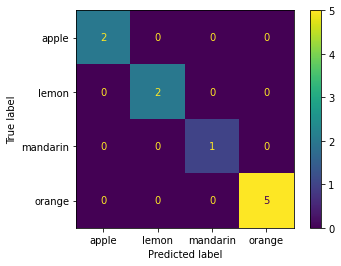

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelo_treinado, X_teste, y_teste)

calcular acurácia média com k-fold


In [ ]:
from sklearn.model_selection import cross_val_score

# O parâmetro cv indica quantas partições criaremos
scores = cross_val_score(modelo, X, y, cv=4)
print("Acurácia média: ", scores.mean())

Acurácia média:  0.8958333333333334


Importar os dados da planilha 'fruit_test.csv' para checar a veracidade

In [ ]:
X = dados_completos.drop('fruit_name', axis=1)
y = dados_completos['fruit_name']

modelo_final = modelo.fit(X,y)

# E podemos agora colocar em produção e usá-lo
frutas = list(cod.transform(['fruit_name'])[0])

vet_pred = [[176,	7.4,	7.2,	0.6], [76,	5.8,	4,	0.81], [166,	6.9,	7.3,	0.93],
           [168,	7.5,	7.6,	0.73],[170,	7.6,	7.9,	0.88],[362,	9.6,	9.2,	0.74],
           [164,	7.2,	7,	0.8],[150,	7.1,	7.9,	0.75],[194,	7.2,	10.3,	0.7],
           [132,	5.8,	8.7,	0.73],[130,	6,	8.2,	0.71]]

predicao = modelo_final.predict(vet_pred)

for i in range(11):
  print(predicao[i])

apple
mandarin
apple
orange
apple
orange
orange
orange
lemon
lemon
lemon
